**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Oscar Alejandro Gutierrez Araiza
*   MATRÍCULA: A00832992


---

En esta actividad trabajarás con el archivo `cleaned_weather.csv`, un extracto del conjunto de datos meteorológicos a lo largo de todo el año 2020 en una estación del Instituto *Max Planck* (Alemania) disponible en Kaggle.

Los datos meteorológicos fueron registrados cada 10 minutos e incluyen los siguientes indicadores:

*   `timestamp`: Fecha y hora de la observación.
*   `p`: Presión atmosférica en milibares (mbar)
*   `T`: Temperatura del aire en grados Celsius (°C)
*   `Tpot`: Temperatura potencial en Kelvin (K)
*   `rh`: Humedad relativa en porcentaje (%)
*   `VPact`: Presión real de vapor en milibares (mbar)
*   `sh`: Humedad específica en gramos por kilogramo (g/kg)
*   `H2OC`: Concentración de vapor de agua en milimoles por mol (mmol/mol) de aire seco
*   `rho`: Densidad del aire en gramos por metro cúbico (g/m³)
*   `wv`: Velocidad del viento en metros por segundo (m/s)
*   `wd`: Dirección del viento en grados (°)
*   `rain`: Precipitación total en milímetros (mm)
*   `raining`: Duración de la lluvia en segundos (s)

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [123]:
# Importa las librerías necesarias
# !pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

1.	Descarga el archivo: `cleaned_weather.csv` y guarda, en un dataframe (`weather_df`), todos sus registros.
- Determina la dimensionalidad del dataframe y obtén los identificadores de columnas.
- Renombra las columnas para facilitar la interpretación de los indicadores en los ejercicios siguientes:
  - `medicion, presion_atmosferica, temperatura_celsius, temperatura_celsius, temperatura_kelvin, humedad_relativa, presion_vapor, humedad_especifica, concentracion_vapor, densidad_aire, velocidad_viento, direccion_viento, precipitacion_total, duracion_lluvia`
- Muestra los primeros y los últimos 5 registros.
- ¿Hay valores faltantes en el dataframe?





In [124]:
# leer datos
weather_df = pd.read_csv('cleaned_weather.csv')

# Determinar dimensionalidad
dimensiones = weather_df.shape
print(f'Dimensiones del DataFrame: {dimensiones[0]} filas y {dimensiones[1]} columnas')

# Cambio de nombres para faclidad

print("Nombres de las columnas antes del cambio:", weather_df.columns.to_list())

rename_map = {
    "timestamp": "medicion",
    "p": "presion_atmosferica",
    "T": "temperatura_celsius",
    "Tpot": "temperatura_kelvin",
    "rh": "humedad_relativa",
    "VPact": "presion_vapor",
    "sh": "humedad_especifica",
    "H2OC": "concentracion_vapor",
    "rho": "densidad_aire",
    "wv": "velocidad_viento",
    "wd": "direccion_viento",
    "rain": "precipitacion_total",
    "raining": "duracion_lluvia",
}

weather_df = weather_df.rename(columns=rename_map)

print("Nombres de las columnas despues del cambio:", weather_df.columns.to_list())

# Mostrar las primeras y últimas filas del DataFrame
print("-"*75)
print("\nPrimeras 5 filas del DataFrame:")
print(weather_df.head())
print("-"*75)
print("\nÚltimas 5 filas del DataFrame:")
print(weather_df.tail())

# Verificar valores faltantes en cada columna
print("-"*75)
print("\nConteo de valores faltantes por columna:")
print(weather_df.isna().sum())

Dimensiones del DataFrame: 52696 filas y 13 columnas
Nombres de las columnas antes del cambio: ['timestamp', 'p', 'T', 'Tpot', 'rh', 'VPact', 'sh', 'H2OC', 'rho', 'wv', 'wd', 'rain', 'raining']
Nombres de las columnas despues del cambio: ['medicion', 'presion_atmosferica', 'temperatura_celsius', 'temperatura_kelvin', 'humedad_relativa', 'presion_vapor', 'humedad_especifica', 'concentracion_vapor', 'densidad_aire', 'velocidad_viento', 'direccion_viento', 'precipitacion_total', 'duracion_lluvia']
---------------------------------------------------------------------------

Primeras 5 filas del DataFrame:
        medicion  presion_atmosferica  temperatura_celsius  \
0  01/01/20 0:10              1008.89                 0.71   
1  01/01/20 0:20              1008.76                 0.75   
2  01/01/20 0:30              1008.66                 0.73   
3  01/01/20 0:40              1008.64                 0.37   
4  01/01/20 0:50              1008.61                 0.33   

   temperatura_kel

- Del output se puede observar que el .csv cuenta con 52696 filas y 13 columnas.
- Se cambió exitosamente el nombre de cada una de las columnas a algo más descriptivo. 
- Se mostraron las primeras 5 y últimas 5 filas.
- El dataset no cuenta con valores faltantes en ninguna de las columnas. 

2. Determina el tipo de datos que tienen las columnas.
- Cambia la columna `medicion` a datetime.
- Obtén dos columnas adicionales separando `medicion` en `fecha` y `hora`.

In [125]:
weather_df['medicion'] = pd.to_datetime(
    weather_df['medicion'],
    format="%d/%m/%y %H:%M",
    errors='coerce'
)

# Crear columnas adicionales 'fecha' y 'hora'
weather_df['fecha'] = weather_df['medicion'].dt.date
weather_df['hora'] = weather_df['medicion'].dt.time

# Mostrar primeros registros para verificar cambios
print("\nPrimeros 5 registros con columnas nuevas:")
print(weather_df[['medicion', 'fecha', 'hora']].head())


Primeros 5 registros con columnas nuevas:
             medicion       fecha      hora
0 2020-01-01 00:10:00  2020-01-01  00:10:00
1 2020-01-01 00:20:00  2020-01-01  00:20:00
2 2020-01-01 00:30:00  2020-01-01  00:30:00
3 2020-01-01 00:40:00  2020-01-01  00:40:00
4 2020-01-01 00:50:00  2020-01-01  00:50:00


In [126]:
print(type(weather_df['medicion'].iloc[0])) # Verificar el tipo de dato de la nueva columna 'medicion'
print(type(weather_df['fecha'].iloc[0])) # Verificar el tipo de dato de la nueva columna 'fecha'
print(type(weather_df['hora'].iloc[0])) # Verificar el tipo de dato de la nueva columna 'fecha'

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.date'>
<class 'datetime.time'>


- Se convirtieron correctamente a los tipos de datos adecuados y se separaron en 2 columnas, una para hora y otra para la fecha. 

3. Determina la cantidad de valores únicos de cada columna.
- La columna `medicion` tiene un valor menos que el número total de filas del dataframe, lo que indica que hay una fecha duplicada. Identifica cuál es.
- Comprueba si las demás columnas también contienen los mismos valores; si es así, elimina  uno de los registros duplicados.


In [127]:
# Encontrar numero de filas unicas
unique_counts = weather_df.nunique()

print(unique_counts)


medicion               52695
presion_atmosferica     5052
temperatura_celsius     3680
temperatura_kelvin      3836
humedad_relativa        5494
presion_vapor           2059
humedad_especifica      1337
concentracion_vapor     2087
densidad_aire          14826
velocidad_viento         977
direccion_viento        8099
precipitacion_total       42
duracion_lluvia           61
fecha                    367
hora                     144
dtype: int64


Con este output se confirma que el número de valores únicos de 'medicion' es 1 menos que el total de filas, lo cual es un fuerte indicador de la presencia de un valor duplicado.

In [128]:
# Encontrar numero de filas duplicadas
num_duplicates = weather_df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

# Mostrar las filas duplicadas
duplicates_mask = weather_df.duplicated()

duplicates = weather_df[duplicates_mask]
print(duplicates)

Número de filas duplicadas: 1
                 medicion  presion_atmosferica  temperatura_celsius  \
19044 2020-05-12 06:00:00               991.53                -1.57   

       temperatura_kelvin  humedad_relativa  presion_vapor  \
19044              272.25              96.2           5.24   

       humedad_especifica  concentracion_vapor  densidad_aire  \
19044                3.29                 5.28        1269.29   

       velocidad_viento  direccion_viento  precipitacion_total  \
19044              1.04             215.4                  0.0   

       duracion_lluvia       fecha      hora  
19044                0  2020-05-12  06:00:00  


In [129]:
# Mostrar ambas filas duplicadas para compararlas
weather_df_duplicates = weather_df[weather_df.duplicated(keep=False)]
print(weather_df_duplicates)

                 medicion  presion_atmosferica  temperatura_celsius  \
19043 2020-05-12 06:00:00               991.53                -1.57   
19044 2020-05-12 06:00:00               991.53                -1.57   

       temperatura_kelvin  humedad_relativa  presion_vapor  \
19043              272.25              96.2           5.24   
19044              272.25              96.2           5.24   

       humedad_especifica  concentracion_vapor  densidad_aire  \
19043                3.29                 5.28        1269.29   
19044                3.29                 5.28        1269.29   

       velocidad_viento  direccion_viento  precipitacion_total  \
19043              1.04             215.4                  0.0   
19044              1.04             215.4                  0.0   

       duracion_lluvia       fecha      hora  
19043                0  2020-05-12  06:00:00  
19044                0  2020-05-12  06:00:00  


In [130]:
# Eliminar una de las filas duplicadas
weather_df = weather_df.drop_duplicates()

num_duplicates = weather_df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


Con esto se elimina una de las filas duplicadas.

4. Imprime nuevamente las cantidad de valores únicos por columna.
- ¿Por qué son 144 horas diferentes?
- La cantidad de combinaciones únicas de fecha y hora no coincide con el número total de mediciones. Aunque no haya valores NaN, esto no garantiza que no se hayan omitido registros. Identifica las fechas en las que faltan mediciones.
- Una vez concluido el análisis de mediciones faltantes, elimina todos los registros que no correspondan al año 2020 y la columna `medicion`.


In [131]:
# Encontrar numero de filas unicas
unique_counts = weather_df.nunique()

print(unique_counts)

medicion               52695
presion_atmosferica     5052
temperatura_celsius     3680
temperatura_kelvin      3836
humedad_relativa        5494
presion_vapor           2059
humedad_especifica      1337
concentracion_vapor     2087
densidad_aire          14826
velocidad_viento         977
direccion_viento        8099
precipitacion_total       42
duracion_lluvia           61
fecha                    367
hora                     144
dtype: int64


- Son 144 horas distintas porque las mediciones se toman en intervalos de 10 minutos, tomando en cuenta que el día tiene 24 horas, se tienen 1440 minutos, por lo que da lugar a 144 mediciones por día.

In [132]:
# Crear una columna combinada de fecha+hora
weather_df['fecha_hora'] = weather_df['fecha'].astype(str) + " " + weather_df['hora'].astype(str)

# Contar cuántas combinaciones únicas hay
num_combinaciones = weather_df['fecha_hora'].nunique()
num_registros = len(weather_df)

print(f"Número de registros: {num_registros}")
print(f"Número de combinaciones únicas fecha+hora: {num_combinaciones}")

if num_combinaciones < num_registros:
    print("Hay registros duplicados de la misma fecha y hora.")
elif num_combinaciones > num_registros:
    print("Faltan mediciones: hay combinaciones de fecha-hora que no están en los datos.")
else:
    print("Todas las combinaciones fecha-hora tienen exactamente un registro.")

Número de registros: 52695
Número de combinaciones únicas fecha+hora: 52695
Todas las combinaciones fecha-hora tienen exactamente un registro.


- Parece que el número de combinaciones de fecha y hora sí coincide con el número de registros (después de haber eliminado duplicados)

In [133]:
# Crear un índice con todas las combinaciones posibles en el rango de fechas
rango_fechas = pd.date_range(start=weather_df['medicion'].min(),
                             end=weather_df['medicion'].max(),
                             freq="10min")

# Comparar contra las mediciones reales
faltantes = rango_fechas[~rango_fechas.isin(weather_df['medicion'])]
print(f"\nNúmero de mediciones faltantes: {len(faltantes)}")
print("Mediciones faltantes:")
print(faltantes)


Número de mediciones faltantes: 9
Mediciones faltantes:
DatetimeIndex(['2020-05-29 09:40:00', '2020-05-29 09:50:00',
               '2020-05-29 10:00:00', '2020-05-29 10:10:00',
               '2020-05-29 10:20:00', '2020-05-29 10:30:00',
               '2020-05-29 10:40:00', '2020-05-29 10:50:00',
               '2020-05-29 11:00:00'],
              dtype='datetime64[ns]', freq='10min')


- Sí faltaron mediciones, el total de mediciones faltantes es de 9 y todas son del mismo día, 20-05-29.


In [134]:
weather_df = weather_df[weather_df['medicion'].dt.year == 2020]

print(f"\nNúmero de registros tras filtrar por 2020: {len(weather_df)}")

# Eliminar la columna medicion 
weather_df = weather_df.drop(columns=['medicion'])


Número de registros tras filtrar por 2020: 52694


- Solamente un registro no formaba parte del 2020

5. Obtén un dataframe `indicadores_diarios` que sólo almacene el mayor valor de las mediciones por fecha para responder:
- ¿Cuál fue la máxima precipitación y a qué fecha pertenece?
- ¿Cuáles fueron los tres días con las velocidades de viento más altas registradas?
- ¿Cuántos días rebasaron el 90% de humedad relativa y los 30° celsius?

In [135]:
# Agrupar por fecha y obtener el valor máximo de cada columna numérica
indicadores_diarios = weather_df.groupby('fecha').max(numeric_only=True)

print("DataFrame de indicadores diarios (primeros 5 registros):")
print(indicadores_diarios.head())

# máxima precipitación y fecha
max_precipitacion = indicadores_diarios['precipitacion_total'].max()
fecha_max_precipitacion = indicadores_diarios['precipitacion_total'].idxmax()

print("-"*75)
print(f"\nMáxima precipitación: {max_precipitacion} mm")
print(f"Fecha de máxima precipitación: {fecha_max_precipitacion}")

# tres días con mayor velocidad de viento
top_viento = indicadores_diarios['velocidad_viento'].nlargest(3)

print("-"*75)
print("\nTop 3 días con mayor velocidad de viento:")
print(top_viento)

# días que superaron 90% de humedad y 30°C
dias_condicion = indicadores_diarios[
    (indicadores_diarios['humedad_relativa'] > 90) &
    (indicadores_diarios['temperatura_celsius'] > 30)
]

print("-"*75)
print(f"\nNúmero de días con >90% humedad y >30°C: {len(dias_condicion)}")
print("Fechas que cumplen la condición:")
print(dias_condicion.index)


DataFrame de indicadores diarios (primeros 5 registros):
            presion_atmosferica  temperatura_celsius  temperatura_kelvin  \
fecha                                                                      
2020-01-01              1008.89                 4.58              277.27   
2020-01-02              1004.16                 6.47              279.72   
2020-01-03               998.45                 8.17              281.80   
2020-01-04              1003.47                 6.61              280.15   
2020-01-05              1009.07                 4.43              277.01   

            humedad_relativa  presion_vapor  humedad_especifica  \
fecha                                                             
2020-01-01              95.0           5.81                3.60   
2020-01-02              93.9           5.57                3.48   
2020-01-03              89.3           9.34                5.86   
2020-01-04              91.4           8.54                5.36   
2020-01-

6. La función `describe()` resume múltiples estadísticas descriptivas. Utiliza esta función para explorar y responder las preguntas sobre las variables en el dataframe de `indicadores_diarios `:
- ¿Cuál es la desviación estándar de la concentración de vapor y qué indica?
- ¿Cuál es la mediana de la presión atmosférica y qué significa?
- ¿Cuál es el tercer cuartil de la duración de la lluvia y cómo se interpreta?

In [136]:
print(indicadores_diarios.describe().T)

                     count         mean         std      min        25%  \
presion_atmosferica  366.0   992.977842    8.543447   959.90   988.0150   
temperatura_celsius  366.0    15.343770    7.850339    -0.12     8.8400   
temperatura_kelvin   366.0   289.431667    7.942175   273.46   282.7325   
humedad_relativa     366.0    90.886530    9.201588    55.44    85.4000   
presion_vapor        366.0    11.409454    4.507555     3.32     7.6475   
humedad_especifica   366.0     7.214016    2.872647     2.05     4.8325   
concentracion_vapor  366.0    11.539180    4.573267     3.29     7.7425   
densidad_aire        366.0  1232.622814   32.702446  1167.05  1207.5900   
velocidad_viento     366.0     5.245164    2.097012     1.57     3.6625   
direccion_viento     366.0   317.673689   50.611324    69.57   279.0750   
precipitacion_total  366.0     0.314208    0.979721     0.00     0.0000   
duracion_lluvia      366.0   240.382514  273.840002     0.00     0.0000   

                        

- La desviación estándar de la concentración de vapor es de 4.57, esto quiere decir que en promedio, los valores se dispersan ±4.57 alrededor de la media (11.54), esto quiere decir que la mayoría de los valores deberían estar en un rango de [6.96, 16.10] (dependiendo de la distribución). 
- La mediana de la presión atmosférica es de 993.3. Este es el valor central de la presión atmosférica diaria, es decir, la mitad de los registros son menores a este valor y la otra mitad son mayores. 
- El tercer cuartil de la duracion de la lluvia es de 600, esto quiere decir que el 75% de los registros tienen un valor menor a este y el otro 25% tienen un valor mayor.

7.	Dibuja un histograma para cada una de las columnas de `indicadores_diarios`.

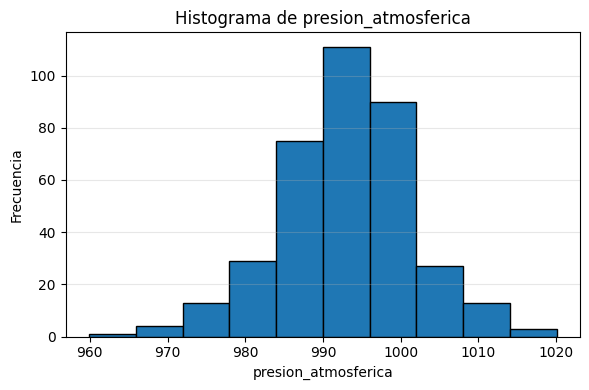

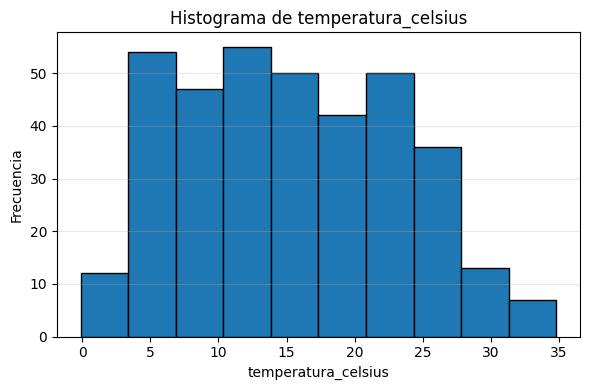

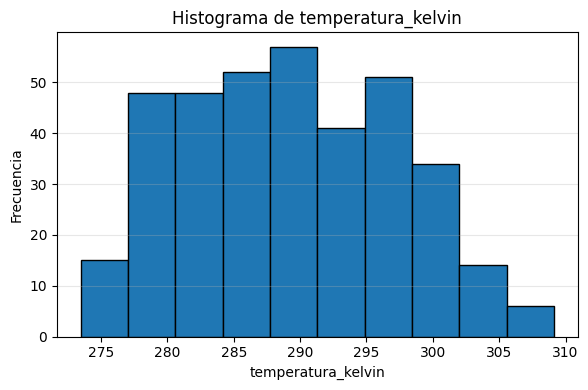

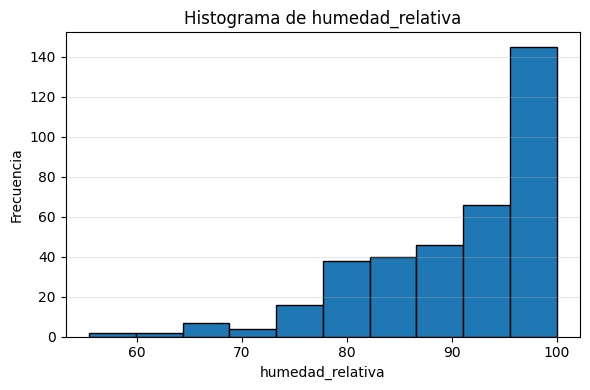

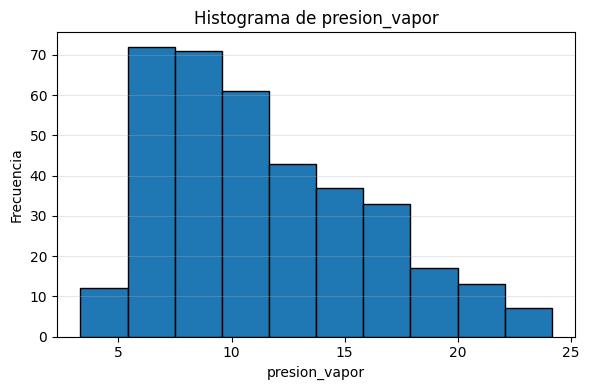

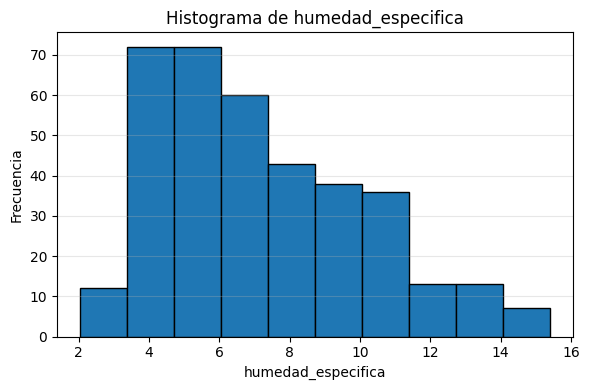

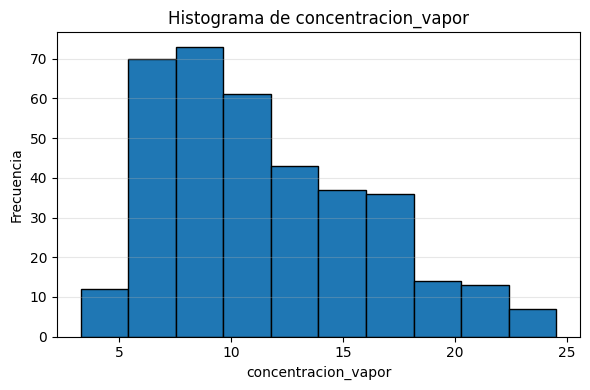

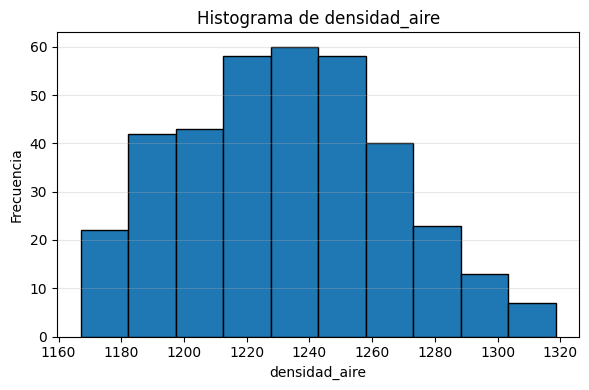

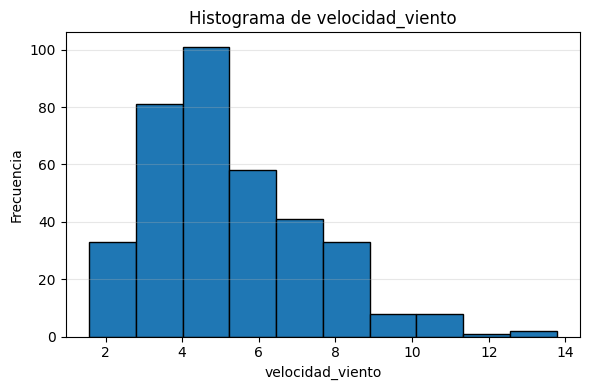

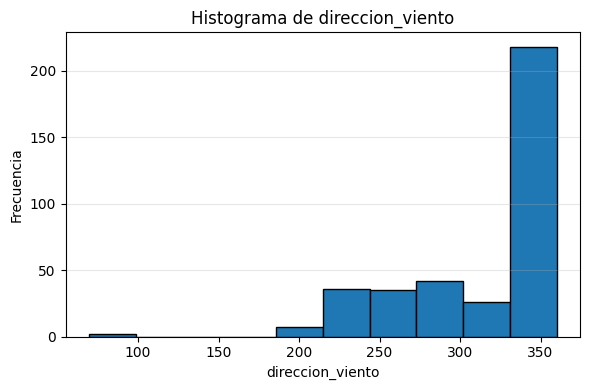

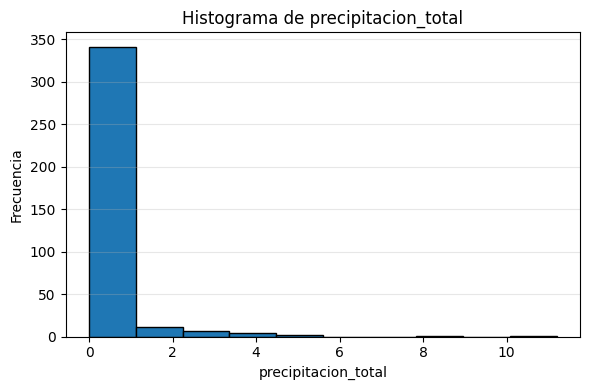

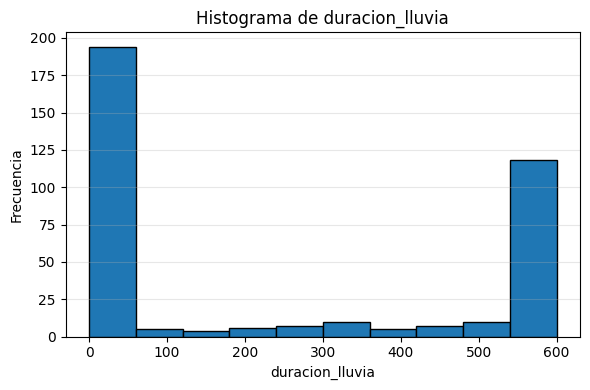

In [137]:
# Graficar histogramas de todas las columnas de indicadores_diarios
for columna in indicadores_diarios.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(indicadores_diarios[columna], edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

8. Utiliza el dataframe de indicadores diarios para crear un nuevo dataframe `indicadores_mensuales`. Para ello:
- Crea una nueva columna `mes` a partir de la fecha que se encuentra en el índice.
- Haciendo uso de `groupby()`, calcula los promedios mensuales y conserva únicamente las columnas `humedad_relativa`, `temperatura_celsius` y `velocidad_viento` en el nuevo dataframe.

In [138]:
indicadores_diarios.index

Index([2020-01-01, 2020-01-02, 2020-01-03, 2020-01-04, 2020-01-05, 2020-01-06,
       2020-01-07, 2020-01-08, 2020-01-09, 2020-01-10,
       ...
       2020-12-22, 2020-12-23, 2020-12-24, 2020-12-25, 2020-12-26, 2020-12-27,
       2020-12-28, 2020-12-29, 2020-12-30, 2020-12-31],
      dtype='object', name='fecha', length=366)

In [139]:
indicadores_diarios.index = pd.to_datetime(indicadores_diarios.index)

# Crear la columna 'mes'
indicadores_diarios['mes'] = indicadores_diarios.index.month

# Calcular promedios mensuales
indicadores_mensuales = (indicadores_diarios.groupby('mes')[['humedad_relativa', 'temperatura_celsius', 'velocidad_viento']].mean())

print("Indicadores mensuales (promedios por mes):")
print(indicadores_mensuales)

Indicadores mensuales (promedios por mes):
     humedad_relativa  temperatura_celsius  velocidad_viento
mes                                                         
1           89.776129             6.821290          5.031935
2           85.719655             8.962414          7.489655
3           85.372903             9.683871          6.421290
4           80.938667            16.879667          4.997000
5           87.464839            17.135484          4.865806
6           94.256000            22.212000          5.296667
7           85.959355            24.336129          4.830323
8           92.002581            26.097742          5.040323
9           97.570000            21.571667          4.153333
10          96.950645            14.089355          5.675484
11          96.983333            10.561667          4.399000
12          97.510968             5.680000          4.817097


9. Construye el mismo dataframe mensual, pero esta vez utilizando la función `pivot_table()`.
- Añade la columna `indice_calor` usando la fórmula de Thom (*Temperature - Humidity Index*, TDI):
> `temperatura_celsius + 0.33 x humedad_relativa - 0.7 x velocidad_viento - 4`

In [140]:
indicadores_diarios.index = pd.to_datetime(indicadores_diarios.index)

# Columna 'mes' (1–12) a partir del índice
indicadores_diarios['mes'] = indicadores_diarios.index.month

# Dataframe mensual usando pivot_table (promedios mensuales)
indicadores_mensuales_pt = pd.pivot_table(
    indicadores_diarios,
    index='mes',
    values=['humedad_relativa', 'temperatura_celsius', 'velocidad_viento'],
    aggfunc='mean'
)

# Agregar índice de calor
indicadores_mensuales_pt['indice_calor'] = (indicadores_mensuales_pt['temperatura_celsius']+ 0.33 * indicadores_mensuales_pt['humedad_relativa']- 0.7  * indicadores_mensuales_pt['velocidad_viento']- 4)

print(indicadores_mensuales_pt)

     humedad_relativa  temperatura_celsius  velocidad_viento  indice_calor
mes                                                                       
1           89.776129             6.821290          5.031935     28.925058
2           85.719655             8.962414          7.489655     28.007141
3           85.372903             9.683871          6.421290     29.362026
4           80.938667            16.879667          4.997000     36.091527
5           87.464839            17.135484          4.865806     38.592816
6           94.256000            22.212000          5.296667     45.608813
7           85.959355            24.336129          4.830323     45.321490
8           92.002581            26.097742          5.040323     48.930368
9           97.570000            21.571667          4.153333     46.862433
10          96.950645            14.089355          5.675484     38.110229
11          96.983333            10.561667          4.399000     35.486867
12          97.510968    

10. Recuerda que de las cuatro funciones estudiadas para manipular la estructura del dataframe:
- `melt/pivot` hacen las transformaciones de manera controlada, es decir puedes
definir por medio de sus parámetros qué variables quedarán como índices, columnas y valores.
- `stack/unstack` la conversión se aplica siempre sobre los niveles inferiores de index/columns.
- Convierte el dataframe del ejercicio anterior a formato largo usando: `melt()` y `stack()` y comenta las diferencias.

In [141]:
df_melt = (
    indicadores_mensuales_pt
    .reset_index(names='mes')          # mes como columna
    .melt(
        id_vars='mes',
        value_vars=['humedad_relativa','temperatura_celsius','velocidad_viento','indice_calor'],
        var_name='variable',
        value_name='valor'
    )
)
print(df_melt)


    mes             variable      valor
0     1     humedad_relativa  89.776129
1     2     humedad_relativa  85.719655
2     3     humedad_relativa  85.372903
3     4     humedad_relativa  80.938667
4     5     humedad_relativa  87.464839
5     6     humedad_relativa  94.256000
6     7     humedad_relativa  85.959355
7     8     humedad_relativa  92.002581
8     9     humedad_relativa  97.570000
9    10     humedad_relativa  96.950645
10   11     humedad_relativa  96.983333
11   12     humedad_relativa  97.510968
12    1  temperatura_celsius   6.821290
13    2  temperatura_celsius   8.962414
14    3  temperatura_celsius   9.683871
15    4  temperatura_celsius  16.879667
16    5  temperatura_celsius  17.135484
17    6  temperatura_celsius  22.212000
18    7  temperatura_celsius  24.336129
19    8  temperatura_celsius  26.097742
20    9  temperatura_celsius  21.571667
21   10  temperatura_celsius  14.089355
22   11  temperatura_celsius  10.561667
23   12  temperatura_celsius   5.680000


In [142]:
df_stack = (
    indicadores_mensuales_pt
    .stack(future_stack=True)
    .rename('valor')
    .reset_index()
)

df_stack.columns = ['mes', 'variable', 'valor']

print(df_stack)


    mes             variable      valor
0     1     humedad_relativa  89.776129
1     1  temperatura_celsius   6.821290
2     1     velocidad_viento   5.031935
3     1         indice_calor  28.925058
4     2     humedad_relativa  85.719655
5     2  temperatura_celsius   8.962414
6     2     velocidad_viento   7.489655
7     2         indice_calor  28.007141
8     3     humedad_relativa  85.372903
9     3  temperatura_celsius   9.683871
10    3     velocidad_viento   6.421290
11    3         indice_calor  29.362026
12    4     humedad_relativa  80.938667
13    4  temperatura_celsius  16.879667
14    4     velocidad_viento   4.997000
15    4         indice_calor  36.091527
16    5     humedad_relativa  87.464839
17    5  temperatura_celsius  17.135484
18    5     velocidad_viento   4.865806
19    5         indice_calor  38.592816
20    6     humedad_relativa  94.256000
21    6  temperatura_celsius  22.212000
22    6     velocidad_viento   5.296667
23    6         indice_calor  45.608813


**Diferencias**

- Control: melt te deja especificar explícitamente id_vars (índices), value_vars (columnas a apilar) y nombres (var_name, value_name). stack siempre apila el/los niveles inferiores de las columnas, sin elegir columnas individuales salvo que haya un filtrado previo.

- output: melt devuelve un DataFrame ya "plano". stack devuelve una Serie con MultiIndex; usualmente se utiliza .reset_index() para obtener un DataFrame largo.

- Deshacer la operación: Desde stack, vuelves al wide dataframe con unstack(). Desde melt, vuelves con pivot_table().